In [1]:
#import numpy for their array management, matplotlib for doing plots
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#number of starting participants
agent_count = 100
#number of rounds we are going to attempt
step_count = 1000000
#easy to ask what happens with the money on every step, thus we start with empty lists
agents = np.empty((step_count,agent_count))
#fill the money that people have, in this case everyone has 500 tokens.
agents[0,:] = agent_count*5 # should be agent_count or greater
#repeat the process step_count times
for i in range(1,step_count):
    #we take a coin from every player
    agents[i] = agents[i-1]-1
    #stores either 1 or 0 depending on whether the player still has money
    living = agents[i]>0
    #counts (or not) those with money
    living_count = np.sum(living)
    #randomly selects winner of the round
    winner = np.random.choice(np.arange(agent_count), p=(living/living_count))
    #gives the money to the winner
    agents[i,winner] += living_count
    #brings to 0 if has no more money, or leaves as it is if still has money
    agents[i] *= living

Although unused in final paper, we were interested in knowing how the number of participants is reduced.

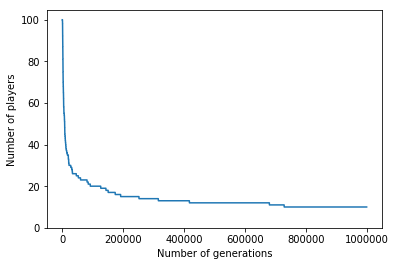

In [3]:
#plot the number of people per round that still had money
plt.plot(np.sum(agents>0, axis=1))
#fix the scales
plt.ylim(ymin=0)
#adds labels
plt.ylabel("Number of players")
plt.xlabel("Number of generations")
#shows the newly created graph
plt.show()

In [4]:
# edited from https://github.com/oliviaguest/gini/
#to calculate gini index, we need an array containing the wealth of everyone in the system
def gini(array):
    #to prevent the values from being 0
    array += 0.0000001
    #the gini index requires the values to be in a non-decreasing order
    array = np.sort(array)
    #index per member of population also sorted
    index = np.arange(1,array.shape[0]+1)
    #number of elements in array
    n = array.shape[0]
    #applies formula of gini index.
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

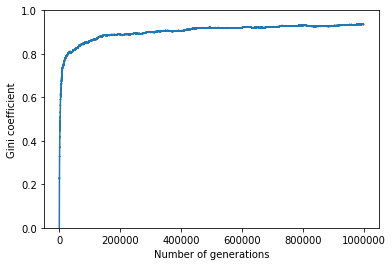

In [5]:
#plot the gini index of every generation (agents)
plt.plot(list(map(gini,agents)))
#fix the scale to be between 0 and 1 - the only possible values for gini index
plt.ylim(0,1)
#adds labels
plt.ylabel("Gini coefficient")
plt.xlabel("Number of generations")
#shows graph
plt.show()